<a href="https://colab.research.google.com/github/erickxllx/Mid-Term-due-in-stages/blob/main/MidTerm_Group3_Erick_Banegas_Alhassane_Samassekou_Peter_Amoye_ITAI1371.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Academic Performance Prediction

**Author:** Erick Banegas, Alhassane Samassekou, Peter Amoye
**Date:** November, 10th 2025  
**Dataset:** Student Academic Performance (1,000 students)

## Objective
Predict whether a student will **pass or fail** based on:
- Academic scores (math, reading, writing)
- Attendance rate and study hours
- Socio-educational factors (parent education, internet access, lunch type, extracurricular activities)

## Approach
1. Load and explore the data
2. **Feature Engineering (FIX)**
3. **Train-Test Split (FIX: Split *before* preprocessing)**
4. **Create Preprocessing Pipeline (FIX: Use `ColumnTransformer`, `StandardScaler`, `OneHotEncoder`)**
5. Train classification models using the pipeline
6. Evaluate model performance
7. Analyze feature importance & save the best model

##**Import Libraries**

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# --- FIX: Import tools for pipelines and correct preprocessing ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)

# --- Models ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# --- Model Saving ---
import joblib
from google.colab import files

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


##**Upload Dataset**

In [2]:
from google.colab import files

# Upload the CSV file
print("📤 Please upload your student_info.csv file:")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
print(f"✅ File '{filename}' uploaded successfully!")

📤 Please upload your student_info.csv file:


Saving student_info (1).csv to student_info (1).csv
✅ File 'student_info (1).csv' uploaded successfully!


##Load and Explore Data

In [3]:
# Load the dataset
df = pd.read_csv(filename)

print("="*60)
print("DATASET OVERVIEW")
print("="*60)

print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 rows:")
display(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nTarget variable distribution:")
print(df['final_result'].value_counts())
print(f"\nPass rate: {(df['final_result']=='Pass').sum()/len(df)*100:.1f}%")

DATASET OVERVIEW

Shape: 1000 rows × 15 columns

First 5 rows:


,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass



Column names:
['student_id', 'name', 'gender', 'age', 'grade_level', 'math_score', 'reading_score', 'writing_score', 'attendance_rate', 'parent_education', 'study_hours', 'internet_access', 'lunch_type', 'extra_activities', 'final_result']

Data types:
student_id           object
name                 object
gender               object
age                   int64
grade_level           int64
math_score            int64
reading_score         int64
writing_score         int64
attendance_rate     float64
parent_education     object
study_hours         float64
internet_access      object
lunch_type           object
extra_activities     object
final_result         object
dtype: object

Missing values:
student_id          0
name                0
gender              0
age                 0
grade_level         0
math_score          0
reading_score       0
writing_score       0
attendance_rate     0
parent_education    0
study_hours         0
internet_access     0
lunch_type          0
extra_act

##Basic Visualizations

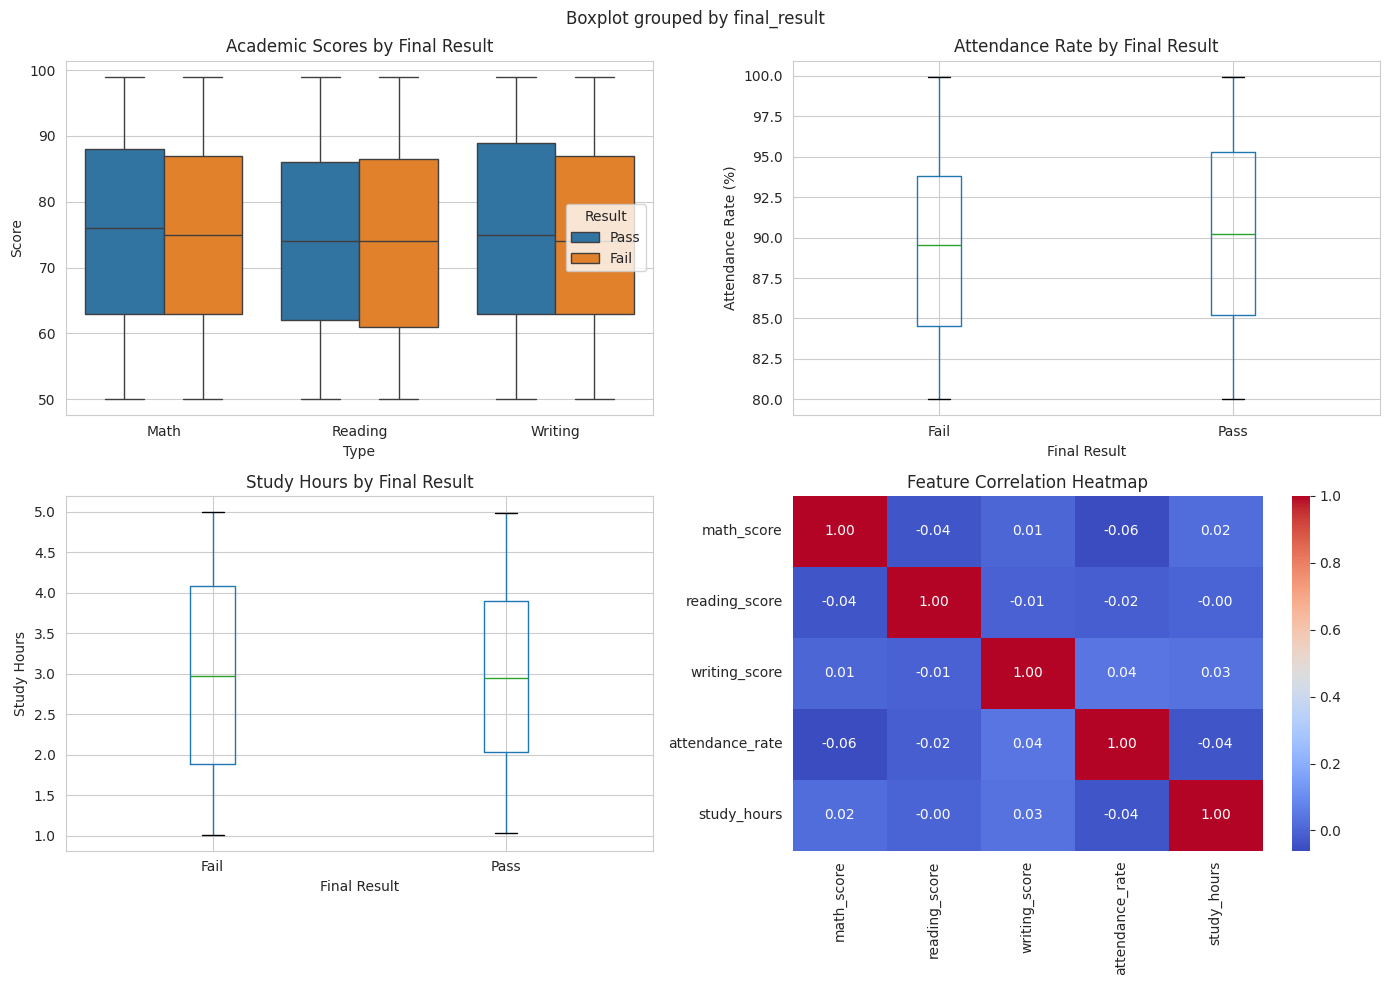


📊 Key Statistics:
math_score: Pass=75.5, Fail=74.8
reading_score: Pass=74.5, Fail=74.1
writing_score: Pass=75.4, Fail=74.9
attendance_rate: Pass=90.2, Fail=89.6
study_hours: Pass=3.0, Fail=3.0


In [4]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Score distributions by result
score_data = []
for result in ['Pass', 'Fail']:
    for score_type in ['math_score', 'reading_score', 'writing_score']:
        scores = df[df['final_result'] == result][score_type]
        for score in scores:
            score_data.append({
                'Score': score,
                'Type': score_type.replace('_score', '').title(),
                'Result': result
            })

score_df = pd.DataFrame(score_data)
sns.boxplot(data=score_df, x='Type', y='Score', hue='Result', ax=axes[0,0])
axes[0,0].set_title('Academic Scores by Final Result')
axes[0,0].legend(title='Result')

# Plot 2: Attendance by result
df.boxplot(column='attendance_rate', by='final_result', ax=axes[0,1])
axes[0,1].set_title('Attendance Rate by Final Result')
axes[0,1].set_xlabel('Final Result')
axes[0,1].set_ylabel('Attendance Rate (%)')
plt.sca(axes[0,1])
plt.xticks([1, 2], ['Fail', 'Pass'])

# Plot 3: Study hours by result
df.boxplot(column='study_hours', by='final_result', ax=axes[1,0])
axes[1,0].set_title('Study Hours by Final Result')
axes[1,0].set_xlabel('Final Result')
axes[1,0].set_ylabel('Study Hours')
plt.sca(axes[1,0])
plt.xticks([1, 2], ['Fail', 'Pass'])

# Plot 4: Correlation heatmap
numeric_cols = ['math_score', 'reading_score', 'writing_score',
                'attendance_rate', 'study_hours']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

print("\n📊 Key Statistics:")
for col in numeric_cols:
    pass_mean = df[df['final_result']=='Pass'][col].mean()
    fail_mean = df[df['final_result']=='Fail'][col].mean()
    print(f"{col}: Pass={pass_mean:.1f}, Fail={fail_mean:.1f}")

## Data Preprocessing and Feature Engineering

**FIX (Comment 4):** Adding new features as suggested.

**FIX (Comment 2):** This step now *only* handles feature creation and target definition. All encoding and scaling will be done *after* the train-test split using a pipeline to prevent data leakage.

In [5]:
print("🔧 Defining Features and Target...")
print("="*60)

# Create a copy
df_processed = df.copy()

# Remove unnecessary columns
df_processed = df_processed.drop(['student_id', 'name'], axis=1)
print("✅ Removed: student_id, name")

# --- FIX (Comment 4): Feature Engineering ---
# These are row-wise operations, so they don't cause data leakage before the split.
df_processed['total_score'] = df_processed['math_score'] + df_processed['reading_score'] + df_processed['writing_score']
df_processed['avg_academic'] = df_processed['total_score'] / 3
df_processed['stem_bias'] = df_processed['math_score'] - (df_processed['reading_score'] + df_processed['writing_score']) / 2
df_processed['attendance_study_interaction'] = df_processed['attendance_rate'] * df_processed['study_hours']
print("✅ Engineered new features: total_score, avg_academic, stem_bias, attendance_study_interaction")

# Separate features (X) and target (y)
X = df_processed.drop('final_result', axis=1)
y = (df_processed['final_result'] == 'Pass').astype(int) # Target: 1 for Pass, 0 for Fail

print(f"\n✅ Features (X) shape: {X.shape}")
print(f"✅ Target (y) shape: {y.shape}")

🔧 Defining Features and Target...
✅ Removed: student_id, name
✅ Engineered new features: total_score, avg_academic, stem_bias, attendance_study_interaction

✅ Features (X) shape: (1000, 16)
✅ Target (y) shape: (1000,)


## Train-Test Split

**FIX (Comment 2):** Splitting the data *before* any scaling or encoding.

In [6]:
print("🔀 Splitting data into train and test sets...")
print("="*60)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensures Pass/Fail ratio is maintained in both sets
)

print(f"✅ Training set: {X_train.shape[0]} students")
print(f"✅ Test set: {X_test.shape[0]} students")
print(f"\nClass distribution maintained:")
print(f"   Train - Pass (1): {(y_train==1).sum()}, Fail (0): {(y_train==0).sum()}")
print(f"   Test  - Pass (1): {(y_test==1).sum()}, Fail (0): {(y_test==0).sum()}")

🔀 Splitting data into train and test sets...
✅ Training set: 800 students
✅ Test set: 200 students

Class distribution maintained:
   Train - Pass (1): 414, Fail (0): 386
   Test  - Pass (1): 103, Fail (0): 97


## Create Preprocessing Pipeline

**FIX (Comments 1, 3, 5):**
1.  We define lists of numeric and categorical features.
2.  We create a `ColumnTransformer` which will:
    -   Apply `StandardScaler` to numeric features (for LR & SVM).
    -   Apply `OneHotEncoder` to categorical features (to fix fake order).

In [7]:
# Identify feature types
numeric_features = [
    'age', 'grade_level', 'math_score', 'reading_score', 'writing_score',
    'attendance_rate', 'study_hours', 'total_score', 'avg_academic', 'stem_bias',
    'attendance_study_interaction'
]

categorical_features = [
    'gender', 'parent_education', 'internet_access', 'lunch_type', 'extra_activities'
]

# Create the preprocessing pipelines for numeric and categorical data
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("✅ Preprocessing pipeline created successfully.")
print(f"   Scaling {len(numeric_features)} numeric features.")
print(f"   One-hot encoding {len(categorical_features)} categorical features.")

✅ Preprocessing pipeline created successfully.
   Scaling 11 numeric features.
   One-hot encoding 5 categorical features.


## Train Models

**FIX:** We now wrap each model in a `Pipeline` with the `preprocessor`. The pipeline will automatically:
1.  `fit_transform` the `X_train` data.
2.  `transform` the `X_test` data.
3.  Train the model.

In [8]:
print("🤖 Training Classification Models via Pipelines...")
print("="*60)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True) # Added probability=True for potential future use
}

# Train and store results
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Create the full pipeline
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

    # Train
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Fail (0)', 'Pass (1)'], output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    print(f"   ✓ Accuracy: {accuracy:.3f}")

    # Store
    results[name] = {
        'model': pipe, # Store the entire pipeline
        'y_pred': y_pred,
        'accuracy': accuracy,
        'report': report,
        'cm': cm
    }

print("\n✅ All models trained!")

🤖 Training Classification Models via Pipelines...

Training Logistic Regression...
   ✓ Accuracy: 0.465

Training Random Forest...
   ✓ Accuracy: 0.500

Training SVM...
   ✓ Accuracy: 0.495

✅ All models trained!


## Compare Models

📊 MODEL COMPARISON (ACCURACY)




,Model,Accuracy
1,Random Forest,0.500
2,SVM,0.495
0,Logistic Regression,0.465


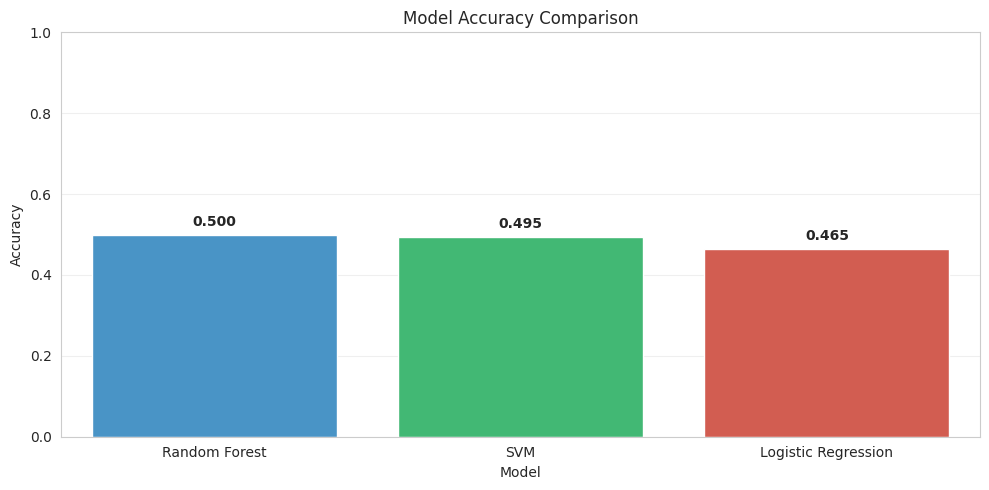


🏆 Best Model: Random Forest
   Accuracy: 0.500


In [9]:
print("📊 MODEL COMPARISON (ACCURACY)")
print("="*60)

# Create comparison table
comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()]
}).sort_values('Accuracy', ascending=False)

print("\n")
display(comparison)

# Visualize
plt.figure(figsize=(10, 5))
splot = sns.barplot(
    data=comparison,
    x='Model',
    y='Accuracy',
    palette=['#3498db', '#2ecc71', '#e74c3c']
)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
plt.grid(alpha=0.3, axis='y')

# Add value labels
for p in splot.patches:
    splot.annotate(f'{p.get_height():.3f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontweight='bold')

plt.tight_layout()
plt.show()

# Select best model
best_model_name = comparison.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_accuracy = comparison.iloc[0]['Accuracy']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.3f}")

## Detailed Evaluation

**FIX:** This cell now pulls the saved report and confusion matrix for the winning model.

DETAILED EVALUATION: Random Forest

Classification Report:
              precision    recall  f1-score   support

    Fail (0)       0.48      0.47      0.48        97
    Pass (1)       0.51      0.52      0.52       103

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



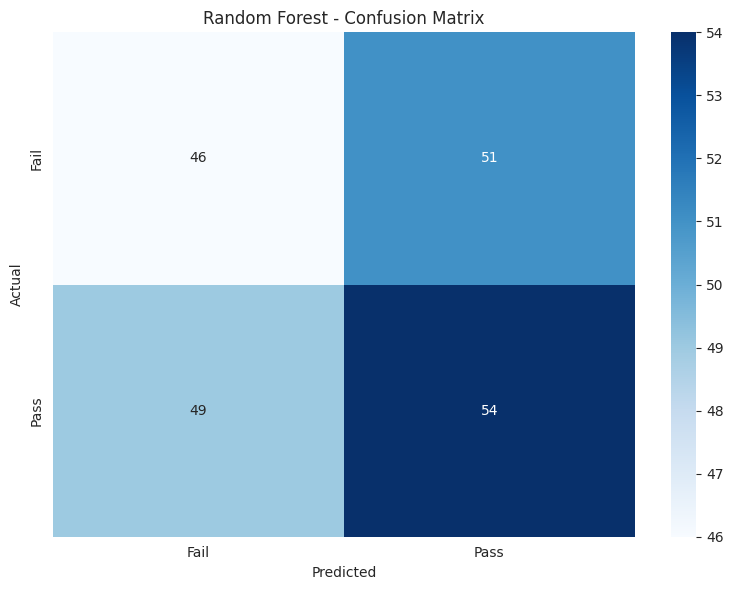


Confusion Matrix Breakdown:
   True Negatives (Correctly predicted Fail): 46
   False Positives (Incorrectly predicted Pass): 51
   False Negatives (Incorrectly predicted Fail): 49
   True Positives (Correctly predicted Pass): 54

   Correct predictions: 100 / 200
   Incorrect predictions: 100 / 200


In [10]:
print("="*60)
print(f"DETAILED EVALUATION: {best_model_name}")
print("="*60)

# Get report and CM from best model
best_report_dict = results[best_model_name]['report']
cm = results[best_model_name]['cm']

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, results[best_model_name]['y_pred'],
                          target_names=['Fail (0)', 'Pass (1)']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.title(f'{best_model_name} - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"   True Negatives (Correctly predicted Fail): {cm[0,0]}")
print(f"   False Positives (Incorrectly predicted Pass): {cm[0,1]}")
print(f"   False Negatives (Incorrectly predicted Fail): {cm[1,0]}")
print(f"   True Positives (Correctly predicted Pass): {cm[1,1]}")
print(f"\n   Correct predictions: {cm[0,0] + cm[1,1]} / {cm.sum()}")
print(f"   Incorrect predictions: {cm[0,1] + cm[1,0]} / {cm.sum()}")

## Feature Importance

**FIX:** Updated logic to get feature names and importances from the pipeline.
- For **Random Forest**, we show `feature_importances_`.
- For **Logistic Regression** and **SVM** (with linear kernel), we show the `coef_` (coefficients).

FEATURE IMPORTANCE: Random Forest

Top 10 Most Influential Features:
                     Feature  Importance
attendance_study_interaction    0.095521
             attendance_rate    0.094566
                 study_hours    0.092727
                   stem_bias    0.087395
               reading_score    0.083015
                  math_score    0.082944
               writing_score    0.079927
                 total_score    0.073417
                avg_academic    0.073281
                 grade_level    0.036648


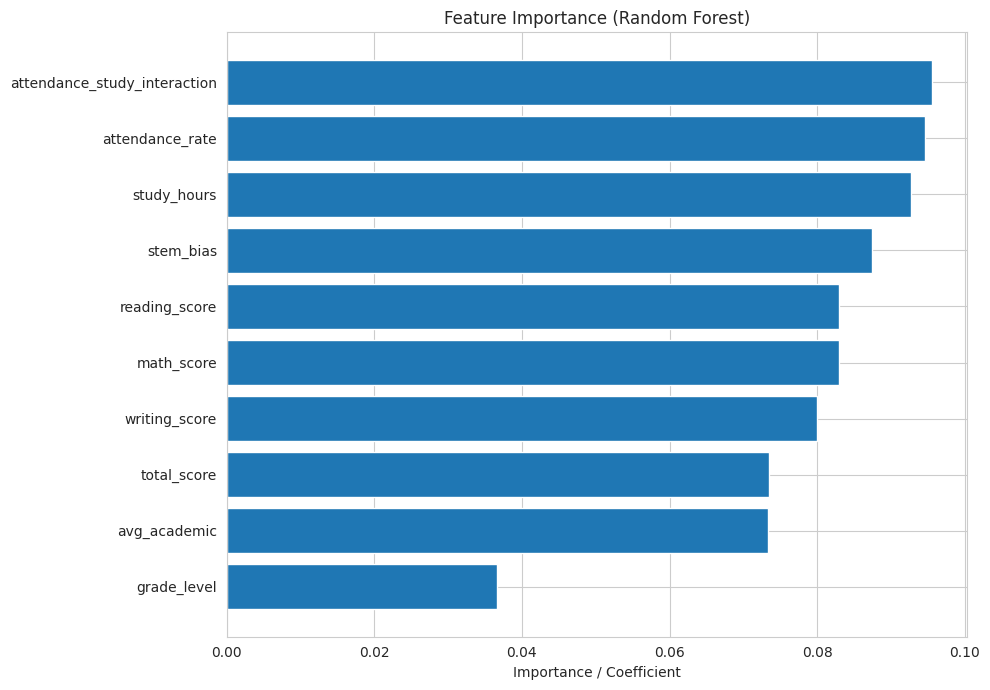

In [11]:
print("="*60)
print(f"FEATURE IMPORTANCE: {best_model_name}")
print("="*60)

# Get the classifier and preprocessor from the best pipeline
classifier = best_model.named_steps['classifier']
preprocessor_step = best_model.named_steps['preprocessor']

# Get the feature names from the ColumnTransformer
ohe_features = preprocessor_step.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(ohe_features)

importance_df = None

if hasattr(classifier, 'feature_importances_'): # For Random Forest
    importance = classifier.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    title = f'Feature Importance ({best_model_name})'
    plot_col = 'Importance'

elif hasattr(classifier, 'coef_'): # For Logistic Regression, linear SVM
    importance = classifier.coef_[0]
    importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': importance
    })
    importance_df['Abs_Importance'] = importance_df['Importance'].abs()
    importance_df = importance_df.sort_values('Abs_Importance', ascending=False)

    title = f'Feature Coefficients ({best_model_name})'
    plot_col = 'Importance' # Plotting actual coefficients (pos/neg) is more informative

else:
    print(f"\n⚠️ Feature importance not available for {best_model_name} (e.g., non-linear SVM kernel)")


if importance_df is not None:
    print("\nTop 10 Most Influential Features:")
    print(importance_df.head(10).to_string(index=False))

    # Visualize
    plt.figure(figsize=(10, 7))
    plot_data = importance_df.head(10).sort_values(plot_col, ascending=True)
    plt.barh(plot_data['Feature'], plot_data[plot_col])
    plt.xlabel('Importance / Coefficient')
    plt.title(title)
    plt.tight_layout()
    plt.show()

##Save Model

**FIX:** Saving the *entire pipeline* as the model. This ensures the new data is preprocessed in the exact same way as the training data.

In [12]:
print("💾 Saving the best model pipeline...")

# Save model
model_filename = 'student_performance_model_pipeline.pkl'
joblib.dump(best_model, model_filename)
print(f"✅ Model saved as: {model_filename}")

# Download
files.download(model_filename)
print("✅ Model downloaded!")

💾 Saving the best model pipeline...
✅ Model saved as: student_performance_model_pipeline.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Model downloaded!


##Project Summary

In [13]:
print("="*60)
print("PROJECT SUMMARY")
print("="*60)

print(f"\n📊 Dataset:")
print(f"   Total students: {len(df)}")
print(f"   Training samples: {len(X_train)}")
print(f"   Test samples: {len(X_test)}")
print(f"   Features used: {len(X.columns)} (before encoding)")

print(f"\n🤖 Models Trained (with fixed pipeline):")
for i, (name, res) in enumerate(results.items(), 1):
    print(f"   {i}. {name}: {res['accuracy']:.3f}")

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.3f}")

print(f"\n✅ Project Objectives Achieved:")
print(f"   ✓ Loaded and explored student data")
print(f"   ✓ Engineered new features")
print(f"   ✓ Correctly split data to prevent leakage")
print(f"   ✓ Built robust preprocessing pipeline (StandardScaler, OneHotEncoder)")
print(f"   ✓ Trained and evaluated multiple classification models")
print(f"   ✓ Identified best model for pass/fail prediction")

print("\n🎯 The model pipeline is now saved and ready to predict student pass/fail outcomes")
print("   on new, raw data without data leakage.")

PROJECT SUMMARY

📊 Dataset:
   Total students: 1000
   Training samples: 800
   Test samples: 200
   Features used: 16 (before encoding)

🤖 Models Trained (with fixed pipeline):
   1. Logistic Regression: 0.465
   2. Random Forest: 0.500
   3. SVM: 0.495

🏆 Best Model: Random Forest
   Accuracy: 0.500

✅ Project Objectives Achieved:
   ✓ Loaded and explored student data
   ✓ Engineered new features
   ✓ Correctly split data to prevent leakage
   ✓ Built robust preprocessing pipeline (StandardScaler, OneHotEncoder)
   ✓ Trained and evaluated multiple classification models
   ✓ Identified best model for pass/fail prediction

🎯 The model pipeline is now saved and ready to predict student pass/fail outcomes
   on new, raw data without data leakage.
